## Logistic Regression Model with TfidfVectorizer with stopwords for predicting r/mensrights

Import the libraries 

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

from sklearn.preprocessing import LabelEncoder

from sklearn import model_selection, naive_bayes, svm
from sklearn.metrics import accuracy_score
from sklearn.utils import shuffle
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import GridSearchCV, train_test_split
from sklearn.linear_model import LogisticRegression


from sklearn.model_selection import KFold
from sklearn import svm, datasets
from sklearn.metrics import f1_score, precision_score, recall_score, classification_report, confusion_matrix, ConfusionMatrixDisplay

Open the files

In [2]:
fem=pd.read_csv('./data/z_complete/fem.csv')
man=pd.read_csv('./data/z_complete/men.csv')
#the two files have an identitical structure just concat them without much fussbecause the work was done upstream

In [3]:
df=pd.concat([fem,man])
df.shape

(12890, 3)

In [4]:
df = shuffle(df)
df.head(5)
#df=df.sample(frac = 0.01)
#Mix the data together because in the early stages I was just using partial bits to get results. SVM takes a very very long time

,subreddit,created_utc,text
338,MensRights,1615596063,Today I decided as one of the complaints of us...
4375,Feminism,1615560165,Forcing you to go work in a machine shop when ...
4513,Feminism,1615580908,Those men are sexists Women get better car ins...
2832,MensRights,1616886857,It should be a felony charge with an equally h...
2269,Feminism,1615967649,It s called hetero patriarchy The vast major...


Modeling

In [5]:
df['subreddit'] = np.where(df['subreddit'] == 'MensRights', 1, 0)
# We will be finding r/MensRights , we need to bianarize the columns 

In [6]:
df.drop(columns='created_utc', inplace=True)
#We do not need the time aspect here at all because that was not ever used

In [7]:
from sklearn.feature_extraction import text
extra_stop_words=['just','like','don','people','think','know','want','gt','say','make','really','good','right','said','ve','time','need','way','doesn','did','post','life','rights','point','things','view','actually','yes','poll','didn','ll','feel','day','mean']
stop_words = text.ENGLISH_STOP_WORDS.union(extra_stop_words)

In [8]:
from sklearn.feature_extraction.text import CountVectorizer, TfidfVectorizer
tfid = TfidfVectorizer(stop_words=stop_words)
#Add the stop words so that we can get some actual idea of the most prevelent words
X = df.text
y= df.subreddit
tfid.fit(X)
text_tf = tfid.transform(df.text)
#Transform
text_df = pd.DataFrame(text_tf.toarray(), columns=tfid.get_feature_names())
text_df

,aacknowledged,aback,abandon,abandoned,abandoning,abbreviation,abby,abc,abdicating,abdication,...,zombies,zone,zoned,zones,zoning,zoo,zoologist,zoom,zora,zygomatic
0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
12885,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
12886,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
12887,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
12888,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


Understanding the objective 

In [9]:
X = text_df.drop(columns=['subreddit'])
stan = StandardScaler()
X_stan = stan.fit_transform(X)
#standard scaler 

In [10]:
X, y = X_stan, y
#correct to avoid the anomoly

In [11]:
X_train, X_test, y_train, y_test = train_test_split(
    X_stan,
    y,
    test_size=0.33,
    random_state=42
)
# train test split very standard

In [12]:
logreg = LogisticRegression(max_iter=5000)
#increase max iteration to get rid of warning

In [13]:
logreg.fit(X_train, y_train)
#fit the model

LogisticRegression(max_iter=5000)

In [14]:
preds = logreg.predict(X_test)
#get predictions

Getting Modeling Scores

In [15]:
#Print out the class report 
report=classification_report(y_test,preds, output_dict=True)
report

{'0': {'precision': 0.9346427362004741,
  'recall': 0.9822064056939501,
  'f1-score': 0.9578344612181156,
  'support': 2810},
 '1': {'precision': 0.9615680245964643,
  'recall': 0.8663434903047091,
  'f1-score': 0.9114754098360655,
  'support': 1444},
 'accuracy': 0.9428772919605077,
 'macro avg': {'precision': 0.9481053803984691,
  'recall': 0.9242749479993296,
  'f1-score': 0.9346549355270906,
  'support': 4254},
 'weighted avg': {'precision': 0.9437823968595738,
  'recall': 0.9428772919605077,
  'f1-score': 0.9420981024509129,
  'support': 4254}}

In [16]:
#Modify the dictionary
new_report={'Not Mensrights': {'precision': 0.9402782490668476,
  'recall': 0.9750175932441942,
  'f1-score': 0.9573328726895838,
  'support': 2842},
 'Mensrights': {'precision': 0.9456771231828616,
  'recall': 0.8753541076487252,
  'f1-score': 0.9091577785950719,
  'support': 1412},
 'accuracy': 0.9419370004701457,
 'macro avg': {'precision': 0.9429776861248547,
  'recall': 0.9251858504464597,
  'f1-score': 0.9332453256423279,
  'support': 4254},
 'weighted avg': {'precision': 0.9420702589991024,
  'recall': 0.9419370004701457,
  'f1-score': 0.9413424559379499,
  'support': 4254}}

In [17]:
shmegel = pd.DataFrame(new_report).transpose()
shmegel
#print it out for presentation

,precision,recall,f1-score,support
Not Mensrights,0.940278,0.975018,0.957333,2842.000000
Mensrights,0.945677,0.875354,0.909158,1412.000000
accuracy,0.941937,0.941937,0.941937,0.941937
macro avg,0.942978,0.925186,0.933245,4254.000000
weighted avg,0.942070,0.941937,0.941342,4254.000000


In [26]:
from tabulate import tabulate
shemegel.to_markdown(tablefmt="grid")
# for read me I refuse to type that thing again please download tabulate: https://pypi.org/project/tabulate/

'+----------------+-------------+----------+------------+-------------+\n|                |   precision |   recall |   f1-score |     support |\n+================+=============+==========+============+=============+\n| Not Mensrights |    0.940278 | 0.975018 |   0.957333 | 2842        |\n+----------------+-------------+----------+------------+-------------+\n| Mensrights     |    0.945677 | 0.875354 |   0.909158 | 1412        |\n+----------------+-------------+----------+------------+-------------+\n| accuracy       |    0.941937 | 0.941937 |   0.941937 |    0.941937 |\n+----------------+-------------+----------+------------+-------------+\n| macro avg      |    0.942978 | 0.925186 |   0.933245 | 4254        |\n+----------------+-------------+----------+------------+-------------+\n| weighted avg   |    0.94207  | 0.941937 |   0.941342 | 4254        |\n+----------------+-------------+----------+------------+-------------+'

Accuracy is the one metric for evaluating classification models in this case we are focused on. So accuracy is the predictions the model got right which can then substantiate the two questions in our presentation with some actual answers. Formally, accuracy has the following definition: Accuracy = Number of True positives over the total number of predictions.

This perfomed better than the SVM model and to be honest the amount of time is insanely faster. 

The model correctly picked out r/mensrights.

Visualize the Data

In [18]:
cm = confusion_matrix(y_test, preds)
cm
#confusion Matrix 

array([[2760,   50],
       [ 193, 1251]], dtype=int64)

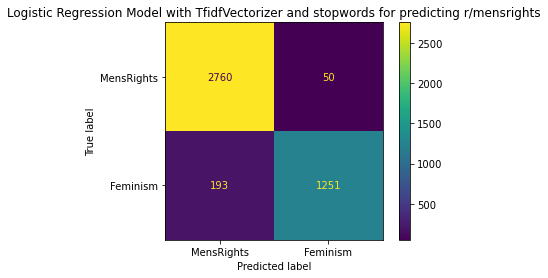

In [20]:
disp = ConfusionMatrixDisplay(cm, display_labels=['MensRights','Feminism']);
disp.plot();
plt.title('Logistic Regression Model with TfidfVectorizer and stopwords for predicting r/mensrights');